# Подготовка и Проверка Датасета для Финансовой Компании в Сфере Льготных Займов для Стартапов

## Цель и задачи  

**Цель:** Подготовить датасет и проверить, что данные в нём соответствуют здравому смыслу, а также ответить на вопросы заказчика как о предобработке, так и о значении данных для бизнеса.

**Задачи:**
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных и объединение таблиц.
4. Сформулировать выводы по проведённому анализу.


## Данные

Для анализа поступили данные с компаниями, сотрудниками и информацией о них:

- `company_and_rounds.csv` — информация о компаниях и раундах финансирования;
- `acquisition.csv` —  информация о покупках одними компаниями других компаний;
- `people.csv` —  информация о сотрудниках;
- `education.csv` —  информация об образовании сотрудника;
- `degrees.csv` —  информация о типе образования сотрудника.


Также поступили два ополнительных датасета, которые связаны с исследуемыми данными:

- `fund.csv` —  информация о фондах;
- `investment.csv` —  информация о раундах инвестирования.

### Описание датасета `acquisition`
- id — идентификатор покупки.
- acquiring_company_id — идентификатор покупающей компании.
- acquired_company_id — идентификатор покупаемой компании.
- term_code — варианты расчёта.
- price_amount — сумма сделки.
- acquired_at — дата сделки.

### Описание датасета `company_and_rounds`
- company ID — идентификатор компании.
- name — название компании.
- category code — категория области деятельности компании.
- status — статус компании.
- founded at — дата инвестирования.
- closed at — дата закрытия компании.
- domain — официальный сайт компании.
- network username — ник компании в сети.
- country code — код страны компании.
- investment rounds — число инвестиционных раундов.
- funding rounds — число раундов финансирования.
- funding total — сумма финансирования.
- milestones — вехи финансирования.
- funding round id — идентификатор этапа финансирования.
- company id — идентификатор компании.
- funded at — дата финансирования.
- funding round type — тип финансирования.
- raised amount — сумма финансирования.
- pre money valuation — предварительная денежная оценка.
- participants — число участников.
- is first round — является ли раунд первым.
- is last round — является раунд последним.

### Описание датасета `education`
- id — идентификатор записи об образовании.
- person_id — идентификатор работника.
- instituition — название учебного заведения.
- graduated_at — дата получения образования.

### Описание датасета `people`
- id — идентификатор сотрудника.
- first_name — имя сотрудника.
- last_name — фамилия сотрудника.
- company_id — идентификатор компании.
- network_username — ник в социальных сетях.

### Описание датасета `degrees`
- id — идентификатор записи.
- object_id — идентификатор сотрудника.
- degree_type — тип образования.
- subject — специальность.

### Описание датасета `fund`
- id — идентификатор фонда.
- name — название фонда.
- category_code — категория области деятельности компании.
- founded_at — дата создания фонда.
- domain — сайт фонда.
- network_username — ник фонда в сети.
- country_code — код страны фонда.
- investment_rounds — число инвестиционных раундов.
- invested_companies — число профинансированных компаний.
- milestones — вехи финансирования.

### Описание датасета `investment`
- id — идентификатор этапа инвестирования.
- funding_round_id — идентификатор раунда инвестирования.
- company_id — индентификатор компании.
- funding_round_type — тип финансирования.
- fund_id — идентификатор фонда.

 
## Структура проекта

1. Загрузка данных и знакомство с ними.
- Вывод общей информации, исправление названия столбцов
- Смена типов и анализ пропусков
   
2. Предобработка данных.
- Раунды финансирования по годам
- Люди и их образование
- Объединять или не объединять — вот в чём вопрос
- Проблемный датасет и причина возникновения пропусков

3. Исследовательский анализ объединённых таблиц
- Объединение данных
- Анализ выбросов
- Куплены забесплатно?
- Цены стартапов по категориям
- Сколько раундов продержится стартап перед покупкой

4. Итоговые выводы и рекомендации.

---

## 1. Загрузка данных и знакомство с ними

### 1.1 Вывод общей информации, исправление названия столбцов

Начнём с загрузки библиотек и датасетов. Будем использовать pandas и библиотеки визуализации данных matplotlib и seaborn, а также phik для построения матрицы корреляции. Данные датасетов сохраним в переменных.

In [ ]:
# Загружаем библиотеки
!pip install pandas matplotlib seaborn matplotlib-venn numpy

In [ ]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
# Выгружаем данные в переменные 
company_and_rounds_df = pd.read_csv('https://code.s3.yandex.net/datasets/company_and_rounds.csv')
acquisition_df = pd.read_csv('https://code.s3.yandex.net/datasets/acquisition.csv')
people_df = pd.read_csv('https://code.s3.yandex.net/datasets/people.csv')
education_df = pd.read_csv('https://code.s3.yandex.net/datasets/education.csv')
degrees_df = pd.read_csv('https://code.s3.yandex.net/datasets/degrees.csv')
fund_df = pd.read_csv('https://code.s3.yandex.net/datasets/fund.csv')
investment_df = pd.read_csv('https://code.s3.yandex.net/datasets/investment.csv')

Проверим названия столбцов в датасетах с названиями, которые можно изменить для удобства:

In [ ]:
print(company_and_rounds_df.columns)

Index(['company  ID', 'name', 'category  code', 'status', 'founded  at',
       'closed  at', 'domain', 'network  username', 'country  code',
       'investment  rounds', 'funding  rounds', 'funding  total', 'milestones',
       'funding  round  id', 'company  id', 'funded  at',
       'funding  round  type', 'raised  amount', 'pre  money  valuation',
       'participants', 'is  first  round', 'is  last  round'],
      dtype='object')


Мы видим, что есть названия, которые стоит изменить - привести столбцы к snake case и сделать заглавные буквы строчными, к этому этапу мы приступим в шаге 1.2.

Сейчас познакомимся с данными датасетов — выведем информацию о них методом `info()`:

In [ ]:
# Выводим информацию о датафрейме
company_and_rounds_df.info()
acquisition_df.info()
people_df.info()
education_df.info()
degrees_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   company  ID            217472 non-null  float64
 1   name                   217472 non-null  object 
 2   category  code         143886 non-null  object 
 3   status                 217472 non-null  object 
 4   founded  at            109956 non-null  object 
 5   closed  at             3449 non-null    object 
 6   domain                 147159 non-null  object 
 7   network  username      95534 non-null   object 
 8   country  code          108607 non-null  object 
 9   investment  rounds     217472 non-null  float64
 10  funding  rounds        217472 non-null  float64
 11  funding  total         217472 non-null  float64
 12  milestones             217472 non-null  float64
 13  funding  round  id     52928 non-null   float64
 14  company  id            52928 non-nul

Также проверим данные и выведем первые строки методом `head()`

In [ ]:
# Выводим первые строки датафрейма на экран
company_and_rounds_df.head()

,company ID,name,category code,status,founded at,closed at,domain,network username,country code,investment rounds,...,milestones,funding round id,company id,funded at,funding round type,raised amount,pre money valuation,participants,is first round,is last round
0,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,888.0,1.0,2005-10-01,series-a,5250000.0,0.0,2.0,0.0,1.0
1,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,889.0,1.0,2007-01-01,series-b,9500000.0,0.0,3.0,0.0,0.0
2,1.0,Wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,BachelrWetpaint,USA,0.0,...,5.0,2312.0,1.0,2008-05-19,series-c+,25000000.0,0.0,4.0,1.0,0.0
3,10.0,Flektor,games_video,acquired,NaN,NaN,flektor.com,NaN,USA,0.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,100.0,There,games_video,acquired,NaN,NaN,there.com,NaN,USA,0.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


В датафрейме `company_and_rounds_df` можно поменять `company ID` и `company id` на `int64`, потому что в данных присутствуют целые числа, а не десятичные. То же самое можно сделать со толбцом `participants`, потому что кол-во участников - целое число. Также нужно подробно рассмотерть столбцы `is first roud` и `is last round`, может, их нужно будет привести к булевому значению, так как они имеют значение да-нет.
Столбец с датами имеет тип object, его нужно преобразовать в `datetime64`.

In [ ]:
acquisition_df.head()

,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1,11,10,NaN,20000000,2007-05-30
1,7,59,72,cash,60000000,2007-07-01
2,8,24,132,cash,280000000,2007-05-01
3,9,59,155,cash,100000000,2007-06-01
4,10,212,215,cash,25000000,2007-07-01


In [ ]:
people_df.head()

,id,first_name,last_name,company_id,network_username
0,10,Mark,Zuckerberg,5.0,NaN
1,100,Peter,Lester,27.0,NaN
2,1000,Dr. Steven,E. Saunders,292.0,NaN
3,10000,Neil,Capel,2526.0,NaN
4,100000,Sue,Pilsch,NaN,NaN


В датафрейме `people_df` можно поменять `company_id` на тип int64.

In [ ]:
education_df.head()

,id,person_id,instituition,graduated_at
0,1,6117,NaN,NaN
1,2,6136,"Washington University, St. Louis",1990-01-01
2,3,6136,Boston University,1992-01-01
3,4,6005,University of Greenwich,2006-01-01
4,5,5832,Rice University,NaN


In [ ]:
degrees_df.head()

,id,object_id,degree_type,subject
0,1,p:6117,MBA,NaN
1,2,p:6136,BA,"English, French"
2,3,p:6136,MS,Mass Communication
3,4,p:6005,MS,Internet Technology
4,5,p:5832,BCS,"Computer Science, Psychology"


### 1.2. Смена типов и анализ пропусков
При первичном анализе мы обнаружили множество типов данных, которые можно и следует поменять, а также названия некоторых столбцов, которые также нужно привести в правильную форму:

In [ ]:
# Очистка названий столбцов в company_and_rounds_df
company_and_rounds_df.columns = (
    company_and_rounds_df.columns
    .str.strip()  # Убираем пробелы по краям
    .str.replace(r'\s+', '_', regex=True)  # Меняем пробелы на "_"
    .str.lower()  # Делаем строчными
)

In [ ]:
#Удалим один из столбцов с идентификатором компании, потому что они дублируются и имеют одинаковое название
company_and_rounds_df = company_and_rounds_df.loc[:, ~company_and_rounds_df.columns.duplicated()]

In [ ]:
# Проверим результат
print(company_and_rounds_df.columns)

Index(['company_id', 'name', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'network_username', 'country_code',
       'investment_rounds', 'funding_rounds', 'funding_total', 'milestones',
       'funding_round_id', 'funded_at', 'funding_round_type', 'raised_amount',
       'pre_money_valuation', 'participants', 'is_first_round',
       'is_last_round'],
      dtype='object')


Мы поменяли названия столбцов и удалили дублирующиеся столбцы, теперь попробуем привести типы данных к удобным для работы в `company_and_rounds_df`:

In [ ]:
# Заменяем NaN в participants на -1 и поменяем тип
company_and_rounds_df["participants"] = company_and_rounds_df["participants"].fillna(-1).astype("int64")

In [ ]:
# Преобразуем даты в datetime64
date_columns = ["founded_at", "closed_at", "funded_at"]
for col in date_columns:
    company_and_rounds_df[col] = pd.to_datetime(company_and_rounds_df[col], errors="coerce")

In [ ]:
# Проверим результат
company_and_rounds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217774 entries, 0 to 217773
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   company_id           217472 non-null  float64       
 1   name                 217472 non-null  object        
 2   category_code        143886 non-null  object        
 3   status               217472 non-null  object        
 4   founded_at           109956 non-null  datetime64[ns]
 5   closed_at            3449 non-null    datetime64[ns]
 6   domain               147159 non-null  object        
 7   network_username     95534 non-null   object        
 8   country_code         108607 non-null  object        
 9   investment_rounds    217472 non-null  float64       
 10  funding_rounds       217472 non-null  float64       
 11  funding_total        217472 non-null  float64       
 12  milestones           217472 non-null  float64       
 13  funding_round_

В датафрейме `people_df` поменяем `company_id` на тип `int64`:

В оставшишхся датафреймах поменяем столбцы со временем на нужный тип данных:

In [ ]:
# Преобразуем даты из acquisition_df
acquisition_df["acquired_at"] = pd.to_datetime(acquisition_df["acquired_at"], errors="coerce")

In [ ]:
# Проверим результат
acquisition_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9407 entries, 0 to 9406
Data columns (total 6 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   id                    9407 non-null   int64         
 1   acquiring_company_id  9407 non-null   int64         
 2   acquired_company_id   9407 non-null   int64         
 3   term_code             1831 non-null   object        
 4   price_amount          9407 non-null   int64         
 5   acquired_at           9378 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 441.1+ KB


In [ ]:
# Преобразуем даты из education_df
education_df["graduated_at"] = pd.to_datetime(education_df["graduated_at"], errors="coerce")

In [ ]:
# Проверим результат
education_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109610 entries, 0 to 109609
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            109610 non-null  int64         
 1   person_id     109610 non-null  int64         
 2   instituition  109555 non-null  object        
 3   graduated_at  58054 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 3.3+ MB


#### Промежуточные выводы

В ходе знакомства с данными мы:
- Выявили дублированные столбцы и неформальные наименования столбцов,
- Привели к правильному формату названия столбцов и избавились от дубликатов столбцов,
- Заменили формат `object` на `datetime` в столбцах и датафреймах, где это было необходимо,
- Установили заглушки и поменяли некоторые данные из `float` в `int`.

## 2. Предобработка данных

### 2.1. Раунды финансирования по годам

Ответим на следующие вопросы:
- В каком году типичный размер собранных в рамках одного раунда средств был максимален?
- Какая тенденция по количеству раундов и выделяемых в рамках каждого раунда средств наблюдалась в 2013 году?

Составим сводную таблицу по годам:

In [ ]:
# Извлекаем год финансирования
company_and_rounds_df["year"] = company_and_rounds_df["funded_at"].dt.year

# Группируем данные по годам и вычисляем медианное значение и количество раундов
summary = company_and_rounds_df.groupby("year")["raised_amount"].agg(["median", "count"]).reset_index()
summary.columns = ["year", "median_raised_amount", "num_rounds"]

# Вывод сводной таблицы
print(summary)

      year  median_raised_amount  num_rounds
0   1960.0                   0.0           9
1   1973.0                   0.0           1
2   1974.0                   0.0           2
3   1984.0               41000.0           3
4   1985.0                   0.0           1
5   1987.0             1250000.0           2
6   1989.0               15000.0           1
7   1990.0             1000000.0           1
8   1992.0             2000000.0           1
9   1993.0               62500.0           2
10  1994.0             6700000.0           2
11  1995.0             2000000.0           7
12  1996.0               12500.0           7
13  1997.0             3300000.0           9
14  1998.0              100000.0          29
15  1999.0             2000000.0          76
16  2000.0             4200000.0         125
17  2001.0             3000000.0          96
18  2002.0             4200000.0         116
19  2003.0             3000000.0         159
20  2004.0             5000000.0         291
21  2005.0

In [ ]:
# Оставляем только годы с более чем 50 раундами
summary = summary[summary["num_rounds"] > 50]
print(summary)

      year  median_raised_amount  num_rounds
15  1999.0             2000000.0          76
16  2000.0             4200000.0         125
17  2001.0             3000000.0          96
18  2002.0             4200000.0         116
19  2003.0             3000000.0         159
20  2004.0             5000000.0         291
21  2005.0             5500000.0        1633
22  2006.0             5000000.0        2436
23  2007.0             3973320.0        3279
24  2008.0             3110000.0        3774
25  2009.0             2000000.0        4151
26  2010.0             1602500.0        6221
27  2011.0             1200000.0        9204
28  2012.0             1000000.0        9970
29  2013.0             1200000.0       11072


Мы составили сводную таблицу по годам, в которой на основании столбца `raised_amount` для каждого года указан:
- типичный размер средств, выделяемый в рамках одного раунда;
- общее количество раундов финансирования за этот год.
    
Затем ставили в таблице информацию только для тех лет, для которых есть информация о более чем 50 раундах финансирования.

Сделаем график, который будет отражать динамику типичного размера средств, которые стартапы получали в рамках одного раунда финансирования:

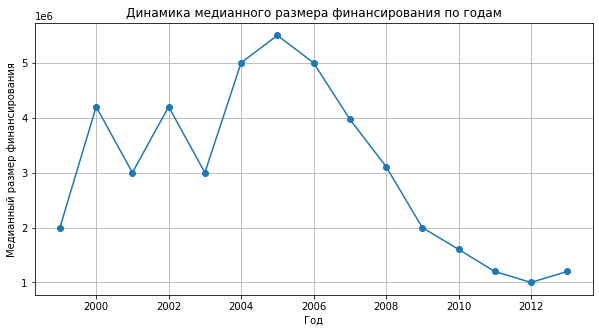

In [ ]:
# Визуализация
plt.figure(figsize=(10, 5))
plt.plot(summary["year"], summary["median_raised_amount"], marker='o', linestyle='-')
plt.xlabel("Год")
plt.ylabel("Медианный размер финансирования")
plt.title("Динамика медианного размера финансирования по годам")
plt.grid()
plt.show()

- Самый высокий типичный размер средств в рамках одного раунда был в 2005 году ($5,500,000).

- Тенденция в 2013 году:
    - Количество раундов финансирования продолжило увеличиваться и достигло 11,072, что является наибольшим значением за представленные годы.
    - Однако типичный размер средств, выделяемых в рамках одного раунда, оставался относительно небольшим — $1,200,000, что ниже значений 2005–2008 годов.
    - Это указывает на тренд: количество раундов росло, но средний размер инвестиций на один раунд снижался.

### 2.2. Люди и их образование

Поймем, зависит ли полнота сведений о сотрудниках (например, об их образовании) от размера компаний.

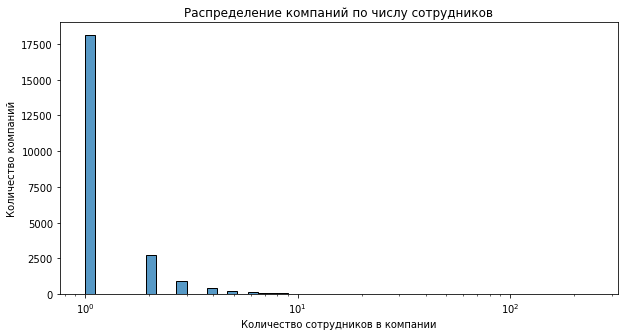

In [ ]:
# Определяем сотрудников без информации об образовании
people_with_edu = education_df["person_id"].unique()
people_df["has_education"] = people_df["id"].isin(people_with_edu)

# Группировка по компаниям и расчет доли сотрудников без образования
df_company_stats = people_df.groupby("company_id")["has_education"].agg(["count", "sum"]).reset_index()
df_company_stats["no_education_ratio"] = 1 - (df_company_stats["sum"] / df_company_stats["count"])

# Анализ распределения размеров компаний
plt.figure(figsize=(10, 5))
sns.histplot(df_company_stats["count"], bins=50, log_scale=(True, False))
plt.xlabel("Количество сотрудников в компании")
plt.ylabel("Количество компаний")
plt.title("Распределение компаний по числу сотрудников")
plt.show()

In [ ]:
# Определение групп по размеру компании (на основе анализа распределения)
bins = [0, 1, 2, 3, 5, 10, 25, float("inf")]
labels = ["1", "2", "3", "4-5", "6-10", "11-25", "26+"]

df_company_stats["company_size"] = pd.cut(df_company_stats["count"], bins=bins, labels=labels, right=True)

# Оценка доли сотрудников без образования по группам размеров компаний
size_analysis = df_company_stats.groupby("company_size")["no_education_ratio"].mean().reset_index()

# Вывод результатов
print(size_analysis)

  company_size  no_education_ratio
0            1            0.462604
1            2            0.466039
2            3            0.486790
3          4-5            0.497307
4         6-10            0.531828
5        11-25            0.458760
6          26+            0.265466


In [ ]:
# Убираем префикс "p:" в столбце object_id в degrees_df
degrees_df["object_id"] = degrees_df["object_id"].str.replace("p:", "", regex=False)

# Приводим типы данных к строковому
education_df["person_id"] = education_df["person_id"].astype(str)
degrees_df["object_id"] = degrees_df["object_id"].astype(str)

# Проверка возможности присоединения degrees.csv
merged_degrees = education_df.merge(degrees_df, left_on="person_id", right_on="object_id", how="left")

# Вывод первых строк для проверки
print(merged_degrees.head())

# Вывод size_analysis (если он ранее определен)
print(size_analysis)

   id_x person_id                      instituition graduated_at  id_y  \
0     1      6117                               NaN          NaT     1   
1     2      6136  Washington University, St. Louis   1990-01-01     2   
2     2      6136  Washington University, St. Louis   1990-01-01     3   
3     3      6136                 Boston University   1992-01-01     2   
4     3      6136                 Boston University   1992-01-01     3   

  object_id degree_type             subject  
0      6117         MBA                 NaN  
1      6136          BA     English, French  
2      6136          MS  Mass Communication  
3      6136          BA     English, French  
4      6136          MS  Mass Communication  
  company_size  no_education_ratio
0            1            0.462604
1            2            0.466039
2            3            0.486790
3          4-5            0.497307
4         6-10            0.531828
5        11-25            0.458760
6          26+            0.265466

Мы разделили информацию о сотрудниках и оценили, возможно ли присоединение таблиц. 

Обоснование выбора границ:
- 1–10 (малые) → стартапы и небольшие фирмы, где часто не ведут строгий учет образования.
- 11–100 (средние) → стабильные малые компании, где могут быть кадровые процессы.
- 101–1000 (крупные) → бизнес, в котором кадровая отчетность более формализована.
- 1001+ (очень крупные) → корпорации с формальными HR-процессами.

Присоединение таблиц возможно при замене типа данных и объединению по `object_id`. В целом, в этом нет необходимости.

Из поулченных данных мы видим, что в очень крупных компаниях доля людей без образования или без информации об образовании значительно выше, чем в остальных компаниях (0.74). Таким образом можно отметить, что полнота сведений о сотрудниках зависит от размера компании.

### 2.3. Объединять или не объединять — вот в чём вопрос


Уникальные network_username в people_df: 38421 из 226709
Уникальные network_username в company_and_rounds_df: 79571 из 217774
Уникальные network_username в fund_df: 2098 из 11652
Дубли в people_df: 188287
Дубли в company_and_rounds_df: 138202
Дубли в fund_df: 9553
Общие значения network_username между people_df и company_and_rounds_df: 2200
Общие значения network_username между people_df и fund_df: 80
Общие значения network_username между company_and_rounds_df и fund_df: 71


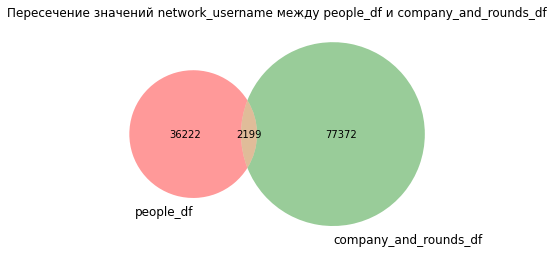

In [ ]:
from matplotlib_venn import venn2

# Проверка уникальности внутри каждого датасета
print("Уникальные network_username в people_df:", people_df["network_username"].nunique(), "из", len(people_df))
print("Уникальные network_username в company_and_rounds_df:", company_and_rounds_df["network_username"].nunique(), "из", len(company_and_rounds_df))
print("Уникальные network_username в fund_df:", fund_df["network_username"].nunique(), "из", len(fund_df))

# Проверка дубликатов
people_duplicates = people_df["network_username"].duplicated().sum()
company_duplicates = company_and_rounds_df["network_username"].duplicated().sum()
fund_duplicates = fund_df["network_username"].duplicated().sum()

print(f"Дубли в people_df: {people_duplicates}")
print(f"Дубли в company_and_rounds_df: {company_duplicates}")
print(f"Дубли в fund_df: {fund_duplicates}")

# Проверка пересечений между датасетами
common_people_company = len(set(people_df["network_username"]).intersection(set(company_and_rounds_df["network_username"])))
common_people_fund = len(set(people_df["network_username"]).intersection(set(fund_df["network_username"])))
common_company_fund = len(set(company_and_rounds_df["network_username"]).intersection(set(fund_df["network_username"])))

print(f"Общие значения network_username между people_df и company_and_rounds_df: {common_people_company}")
print(f"Общие значения network_username между people_df и fund_df: {common_people_fund}")
print(f"Общие значения network_username между company_and_rounds_df и fund_df: {common_company_fund}")

# Визуализация пересечений с помощью диаграммы Венна
plt.figure(figsize=(6,6))
venn2(
    [set(people_df["network_username"].dropna()), set(company_and_rounds_df["network_username"].dropna())],
    set_labels=('people_df', 'company_and_rounds_df')
)
plt.title("Пересечение значений network_username между people_df и company_and_rounds_df")
plt.show()

- В таблице `people_df` — 38,421 уникальных значений `network_username` из 226,709 строк, а в таблице `company_and_rounds_df` — 79,571 уникальных из 217,774 строк.
- В обеих таблицах много дублирующихся значений: 188,287 в people_df и 138,202 в `company_and_rounds_df`.
- Между таблицами 2,200 общих значений `network_username`.
- Столбец `network_username` не является уникальным идентификатором, поэтому его нельзя использовать для объединения данных. Лучше использовать `company_id`.

### 2.4. Проблемный датасет и причина возникновения пропусков


In [ ]:
# Приведение типов ID-столбцов к строковому формату
company_and_rounds_df["company_id"] = company_and_rounds_df["company_id"].astype(str)
company_and_rounds_df["funding_round_id"] = company_and_rounds_df["funding_round_id"].astype(str)

# Создание датасета с информацией о компаниях (удаляем дубликаты)
companies_df = company_and_rounds_df[
    ["company_id", "name", "category_code", "status", "founded_at", "closed_at", "domain", "network_username", "country_code", "investment_rounds", "funding_rounds", "funding_total", "milestones"]
].drop_duplicates().reset_index(drop=True)

# Создание датасета с информацией о раундах финансирования
funding_rounds_df = company_and_rounds_df[
    ["company_id", "funding_round_id", "funded_at", "funding_round_type", "raised_amount", "pre_money_valuation", "participants", "is_first_round", "is_last_round"]
].dropna(subset=["funding_round_id"]).reset_index(drop=True)

# Сортировка по company_id
companies_df = companies_df.sort_values(by="company_id").reset_index(drop=True)
funding_rounds_df = funding_rounds_df.sort_values(by=["company_id", "funded_at"]).reset_index(drop=True)

# Вывод информации
print(f"Размер companies_df: {companies_df.shape}")
print(f"Размер funding_rounds_df: {funding_rounds_df.shape}")

# Просмотр первых строк
display(companies_df.head())
display(funding_rounds_df.head())

Размер companies_df: (196554, 13)
Размер funding_rounds_df: (217774, 9)


,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,10000.0,MYWEBBO,network_hosting,operating,2008-07-26,NaT,mywebbo.com,NaN,NaN,0.0,0.0,0.0,0.0
4,10001.0,THE Movie Streamer,games_video,operating,2008-07-26,NaT,themoviestreamer.com,NaN,NaN,0.0,0.0,0.0,0.0


,company_id,funding_round_id,funded_at,funding_round_type,raised_amount,pre_money_valuation,participants,is_first_round,is_last_round
0,1.0,888.0,2005-10-01,series-a,5250000.0,0.0,2,0.0,1.0
1,1.0,889.0,2007-01-01,series-b,9500000.0,0.0,3,0.0,0.0
2,1.0,2312.0,2008-05-19,series-c+,25000000.0,0.0,4,1.0,0.0
3,10.0,nan,NaT,NaN,NaN,NaN,-1,NaN,NaN
4,100.0,nan,NaT,NaN,NaN,NaN,-1,NaN,NaN


Данные в готовом состоянии. В пункте 1 мы уже обработали данные и привели их к нужному формату, а также удалили дублирующиеся столбцы и т.д.

## 3. Исследовательский анализ объединённых таблиц

### 3.1. Объединение данных


Сделаем фильтрацию для столбцов `funding_rounds`, `investment_rounds`, `status`. Также проверим, чтобы после фильтрации количество компаний было больше 40000:

In [ ]:
# Фильтруем компании, которые имеют инвестиционные или финансовые раунды, либо были приобретены
interested_companies = companies_df[
    (companies_df["funding_rounds"] > 0) |
    (companies_df["investment_rounds"] > 0) |
    (companies_df["status"] == "acquired")
].reset_index(drop=True)

# Просматриваем первые строки
display(interested_companies.head())

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0


In [ ]:
# Проверяем количество отобранных компаний
display(interested_companies.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40747 entries, 0 to 40746
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   company_id         40747 non-null  object        
 1   name               40747 non-null  object        
 2   category_code      35315 non-null  object        
 3   status             40747 non-null  object        
 4   founded_at         27807 non-null  datetime64[ns]
 5   closed_at          2128 non-null   datetime64[ns]
 6   domain             35754 non-null  object        
 7   network_username   20850 non-null  object        
 8   country_code       34742 non-null  object        
 9   investment_rounds  40747 non-null  float64       
 10  funding_rounds     40747 non-null  float64       
 11  funding_total      40747 non-null  float64       
 12  milestones         40747 non-null  float64       
dtypes: datetime64[ns](2), float64(4), object(7)
memory usage: 4.0

None

Данные корректны, количество компаний превышает 40000. Соединим полученные данные с таблицей `acquisition`, это будет нужно для дальнейшей работы:

In [ ]:
# Приводим company_id и id к str
interested_companies["company_id"] = interested_companies["company_id"].astype(float)
acquisition_df["acquired_company_id"] = acquisition_df["acquired_company_id"].astype(float)

# Выполняем объединение
interested_companies = interested_companies.merge(
    acquisition_df, left_on="company_id", right_on="acquired_company_id", how="left"
)

In [ ]:
interested_companies

,company_id,name,category_code,status,founded_at,closed_at,domain,network_username,country_code,investment_rounds,funding_rounds,funding_total,milestones,id,acquiring_company_id,acquired_company_id,term_code,price_amount,acquired_at
0,1.0,Wetpaint,web,operating,2005-10-17,NaT,wetpaint-inc.com,BachelrWetpaint,USA,0.0,3.0,39750000.0,5.0,NaN,NaN,NaN,NaN,NaN,NaT
1,10.0,Flektor,games_video,acquired,NaT,NaT,flektor.com,NaN,USA,0.0,0.0,0.0,0.0,1.0,11.0,10.0,NaN,20000000.0,2007-05-30
2,100.0,There,games_video,acquired,NaT,NaT,there.com,NaN,USA,0.0,0.0,0.0,4.0,20.0,377.0,100.0,cash,0.0,2005-05-29
3,1001.0,FriendFeed,web,acquired,2007-10-01,NaT,friendfeed.com,friendfeed,USA,0.0,1.0,5000000.0,3.0,1901.0,5.0,1001.0,cash_and_stock,47500000.0,2009-08-10
4,10014.0,Mobclix,mobile,acquired,2008-03-01,NaT,mobclix.com,mobclix,USA,0.0,1.0,0.0,4.0,3878.0,23054.0,10014.0,NaN,0.0,2010-09-30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40885,9989.0,Shattered Reality Interactive,games_video,closed,2006-06-01,2012-07-03,srinteractive.com,NaN,USA,0.0,2.0,1100000.0,2.0,NaN,NaN,NaN,NaN,NaN,NaT
40886,999.0,buddystumbler,web,acquired,2007-01-01,NaT,buddystumbler.com,NaN,USA,0.0,0.0,0.0,1.0,1763.0,4447.0,999.0,NaN,113000.0,2008-07-09
40887,9994.0,Imindi,advertising,operating,2008-09-01,NaT,imindi.com,NaN,NaN,0.0,2.0,500000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT
40888,9995.0,FohBoh,public_relations,operating,2007-11-01,NaT,fohboh.com,fohboh,USA,0.0,1.0,750000.0,1.0,NaN,NaN,NaN,NaN,NaN,NaT


Проверим на дубликаты по `company_id`

In [ ]:
# Проверяем количество повторяющихся company_id
duplicates = interested_companies[interested_companies.duplicated(subset="company_id", keep=False)]

# Выводим информацию о дубликатах
print(f"Число дублирующихся company_id: {duplicates['company_id'].nunique()}")

Число дублирующихся company_id: 127


### 3.2. Анализ выбросов


Сделаем Гистограмму и График рассеяния, чтобы оценить типичный и выбивающийся размер общего финансирования:

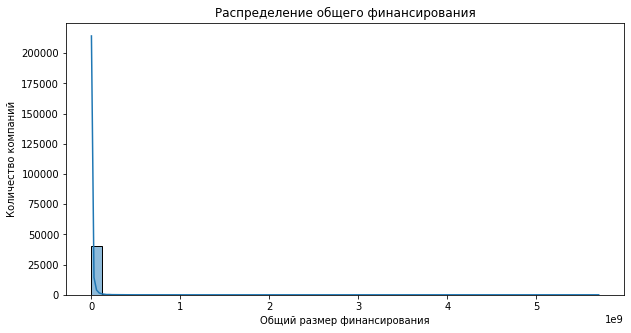

In [ ]:
# Гистограмма распределения финансирования
plt.figure(figsize=(10, 5))
sns.histplot(interested_companies["funding_total"], bins=50, kde=True)
plt.xlabel("Общий размер финансирования")
plt.ylabel("Количество компаний")
plt.title("Распределение общего финансирования")
plt.show()

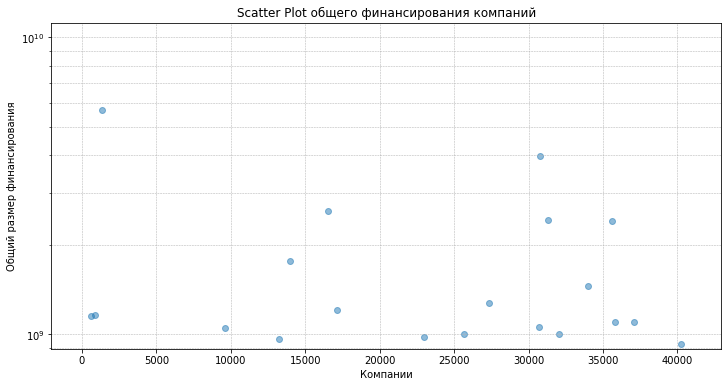

In [ ]:
# Строим scatter plot для наглядности
plt.figure(figsize=(12, 6))
company_indices = np.arange(len(interested_companies))
plt.scatter(company_indices, interested_companies["funding_total"], alpha=0.5)
plt.xlabel("Компании")
plt.ylabel("Общий размер финансирования")
plt.title("Scatter Plot общего финансирования компаний")
plt.yscale("log")  # Логарифмируем ось Y, если данные сильно разбросаны
plt.grid(True, which="both", linestyle="--", linewidth=0.5)
plt.show()

Мы значительный разброс значений на графике рассеивания. На гистограмме можн заметить, что в общий размер финансирования преобладает на отметке 0.

In [ ]:
# Статистика по столбцу funding_total
funding_stats = interested_companies["funding_total"].describe()
print(funding_stats)

count    4.089000e+04
mean     1.013559e+07
std      5.641289e+07
min      0.000000e+00
25%      0.000000e+00
50%      6.000000e+05
75%      5.631320e+06
max      5.700000e+09
Name: funding_total, dtype: float64


- Среднее значение не является хорошим показателем центра распределения. Оно сильно завышено из-за наличия экстремально больших значений.
- Медиана лучше отражает "типичное" финансирование, так как не чувствительна к выбросам.
- Для оценки "типичного" финансирования лучше ориентироваться на медиану и межквартильный размах (IQR, от 25% до 75%).

### 3.3. Куплены забесплатно?
- Исследуем компании, которые были проданы за ноль или за один доллар, и при этом известно, что у них был ненулевой общий объём финансирования.
- Рассчитаем аналитически верхнюю и нижнюю границу выбросов для столбца funding_total и укажите, каким процентилям границы соответствуют.

Для этого отфильтруем компании и рассчитает границы процентилей:

In [ ]:
# Фильтруем компании, которые были проданы за 0 или 1 доллар
sold_for_nothing = interested_companies[
    (interested_companies["price_amount"].isin([0, 1])) & 
    (interested_companies["funding_total"] > 0)
]

In [ ]:
# Рассчитываем границы выбросов для funding_total
Q1 = interested_companies["funding_total"].quantile(0.25)
Q3 = interested_companies["funding_total"].quantile(0.75)
IQR = Q3 - Q1

lower_bound = max(0, Q1 - 1.5 * IQR)  # Финансирование не может быть отрицательным
upper_bound = Q3 + 1.5 * IQR

In [ ]:
# Определяем, каким процентилям соответствуют границы
lower_percentile = (interested_companies["funding_total"] <= lower_bound).mean() * 100
upper_percentile = (interested_companies["funding_total"] <= upper_bound).mean() * 100

In [ ]:
print(f"Компании, проданные за 0 или 1 доллар: {len(sold_for_nothing)}")
print(f"Нижняя граница выбросов: {lower_bound} (соответствует {lower_percentile:.2f} процентилю)")
print(f"Верхняя граница выбросов: {upper_bound} (соответствует {upper_percentile:.2f} процентилю)")

Компании, проданные за 0 или 1 доллар: 1618
Нижняя граница выбросов: 0 (соответствует 31.72 процентилю)
Верхняя граница выбросов: 14078300.0 (соответствует 85.60 процентилю)


- Компаний, проданных за 0 или 1 нет.
- Нижняя граница выбросов - 0, а треть сделок в выборке (до 31.59%) приходится на нулевые или крайне низкие цены, что подтверждает распространённость номинальных сделок.
- Верхняя граница выбросов говорит о том, что только около 14.38% сделок (100% – 85.62%) превышают сумму 14,126,625 долларов, что говорит о резком росте цен в "хвосте" распределения (характерно для редких крупных сделок)

### 3.4. Цены стартапов по категориям
- Категории стартапов с типично высокими ценами покупки стартапов и значительным разбросом цен могут быть привлекательными для крупных инвесторов, которые готовы к высоким рискам ради потенциально больших доходов. Среди категорий стартапов выделим категории стартапов, характеризующиеся:
   - типично высокими ценами;
   - и наибольшим разбросом цен за стартап.

In [ ]:
category_stats = (
    interested_companies.groupby('category_code')['price_amount']
    .agg(['median', 'std', 'count'])  # Здесь выполняется агрегация
    .query("count >= 5")  # Фильтруем категории, где количество сделок больше или равно 5
    .sort_values(by='median', ascending=False)  # Сортируем по медиане
)

# Выведем топ-5 категорий по медианному финансированию
display(category_stats.head(5))

,median,std,count
category_code,,,
manufacturing,72000000.0,9.696580e+08,29
real_estate,50000000.0,2.505123e+09,7
automotive,43000000.0,2.297758e+09,5
biotech,13200000.0,1.540374e+09,454
hospitality,12500000.0,6.514494e+08,11


In [ ]:
print("Количество строк с ненулевой ценой сделки:", interested_companies['price_amount'].notna().sum())


Количество строк с ненулевой ценой сделки: 9390


### 3.5. Сколько раундов продержится стартап перед покупкой


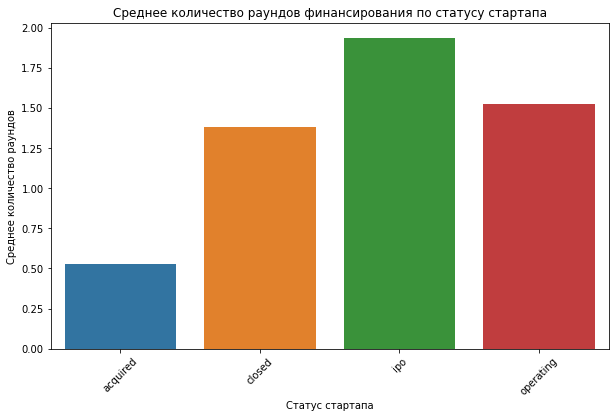

In [ ]:
# Рассчитаем среднее количество раундов для каждого статуса стартапа
rounds_by_status = interested_companies.groupby('status')['funding_rounds'].mean().reset_index()

# Построим график
plt.figure(figsize=(10, 6))
sns.barplot(x='status', y='funding_rounds', data=rounds_by_status)
plt.title('Среднее количество раундов финансирования по статусу стартапа')
plt.xlabel('Статус стартапа')
plt.ylabel('Среднее количество раундов')
plt.xticks(rotation=45)

plt.show()

- Стартапы с статусом `ipo` имеют больше всего раундов. Это может говорить о том, что в стартапах в таком статусе чаще всего заинтересованы инвесторы.
- Стартапы с статусом `acquired` имеют меньше всего раундов. Это говорит о меньшей привлекательности стартапов с таким статусом для финансирвоания.

# 4. Итоговый вывод и рекомендации

- В ходе проекта мы сделали предоработку данных: изменили названия столбцов, типы данных, объединили нужные таблицы. Был проведен анализ пропусков, чтобы понять, насколько полно представлены данные.
- Построена сводная таблица по годам, показана динамика типичного размера средств и общего числа раундов. Оценена полнота данных об образовании сотрудников, зависит от размера компании. Проверено, насколько можно объединить таблицы по столбцу network_username.
- Оценены типичные и выбивающиеся значения для общего финансирования. Существуют значительные выбросы с высокими суммами. Исследованы компании, купленные за 0 или 1 доллар с ненулевым финансированием. Выделены категории стартапов с высокими ценами и значительным разбросом цен. Оценено среднее количество раундов для разных статусов стартапов.

Общие выводы:
- Высокие цены и большой разброс цен характерны для стартапов, привлекательных для крупных инвесторов.
- Стартапы с большим количеством раундов финансирования чаще приобретаются.
- Проект продемонстрировал взаимосвязь между размером финансирования, количеством раундов и покупкой стартапов, что подтверждает правильность используемых методов.